<a href="https://colab.research.google.com/github/Sine22/SINE_NOTE/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series


In [ ]:
!pip install xgboost

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


import xgboost as xgb

In [ ]:
import pandas as pd

# Use the raw URL to access the CSV data directly from GitHub
url = 'https://raw.githubusercontent.com/Sine22/SINE_NOTE/main/AEP_hourly.csv'

# Load the dataset
df = pd.read_csv(url)

# Display the first few rows to verify
display(df.head())

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.tail()

,AEP_MW
Datetime,
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0
2018-01-01 23:00:00,20415.0
2018-01-02 00:00:00,19993.0


In [5]:
df.set_index('Datetime', inplace=True)

KeyError: "None of ['Datetime'] are in the columns"

# Task
Perform exploratory data analysis (EDA) on the hourly energy consumption dataset from "https://raw.githubusercontent.com/Sine22/SINE_NOTE/main/AEP_hourly.csv". Start by addressing the KeyError by verifying if 'Datetime' is already the index, ensuring it is a proper DatetimeIndex, and handling any sorting or duplicates. Then, generate descriptive statistics for the 'AEP_MW' column, visualize the hourly consumption trends over time, and analyze seasonal patterns by extracting time-based features (hour, day, month) to create boxplots. Finally, summarize the key findings regarding peak usage and consumption trends.

## Explain Error and Verify Index

### Subtask:
Explain the source of the KeyError, verify the index of the DataFrame, convert it to a DatetimeIndex, and handle sorting and duplicates.


### Explanation of the KeyError

The `KeyError` occurred because 'Datetime' was already set as the index of the DataFrame during the initial data loading or a previous operation. When 'Datetime' is the index, it is no longer treated as a column, so `df.set_index('Datetime')` fails because it cannot find 'Datetime' in the list of available columns.

**Reasoning**:
Convert the current index to a DatetimeIndex, sort it chronologically, and remove any duplicate timestamps as per the subtask instructions.



In [7]:
import pandas as pd

# Convert index to DatetimeIndex
df.index = pd.to_datetime(df.index)

# Sort the index to ensure chronological order
df = df.sort_index()

# Check for and remove duplicate indices
duplicate_count = df.index.duplicated().sum()
print(f"Number of duplicate indices found: {duplicate_count}")
if duplicate_count > 0:
    df = df[~df.index.duplicated(keep='first')]
    print("Duplicates removed.")

# Verify the index type and display the first few rows
df.info()
display(df.head())

Number of duplicate indices found: 0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121269 entries, 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121269 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


,AEP_MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


## Descriptive Statistics

### Subtask:
Generate summary statistics (mean, median, min, max) for the 'AEP_MW' energy consumption data to understand its distribution.


**Reasoning**:
Generating summary statistics is a fundamental step in exploratory data analysis. It allows us to understand the central tendency, dispersion, and overall range of the 'AEP_MW' energy consumption data, highlighting the average usage and extremes like peak and low demand periods.

**Reasoning**:
I will calculate and display the descriptive statistics, including mean, standard deviation, min, max, and median for the 'AEP_MW' column to understand its distribution as required by the subtask.



In [8]:
import pandas as pd

# Generate descriptive statistics for AEP_MW
stats = df['AEP_MW'].describe()

# Calculate the median as it's not in the default describe output
median_val = df['AEP_MW'].median()

# Combine and display the results
print("Descriptive Statistics for AEP_MW:")
print(stats)
print(f"median    {median_val}")

Descriptive Statistics for AEP_MW:
count    121269.000000
mean      15499.652351
std        2591.321478
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64
median    15310.0


## Time Series Visualization

### Subtask:
Plot the hourly energy consumption over time to visualize the overall trend and identify any obvious patterns or anomalies.


### Visualizing Energy Consumption Over Time

To understand the overall behavior of the dataset, we will plot the hourly energy consumption. This visualization allows us to see multi-year trends, annual seasonality (peaks in winter/summer), and potentially identify any data gaps or extreme outliers.

**Reasoning**:
I will now create a line plot of the hourly energy consumption using matplotlib to visualize the long-term trends and seasonality as specified in the instructions.



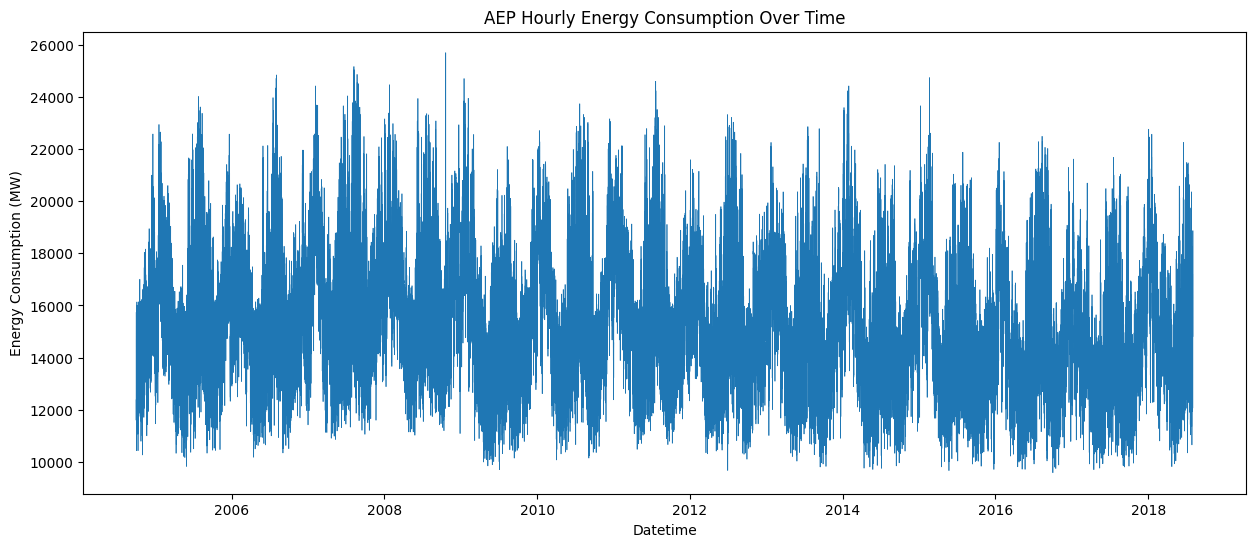

In [9]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the hourly energy consumption
plt.plot(df.index, df['AEP_MW'], color='tab:blue', linewidth=0.5)

# Add titles and labels
plt.title('AEP Hourly Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')

# Display the plot
plt.show()

## Seasonal and Periodic Analysis

### Subtask:
Analyze energy consumption patterns by extracting time-based features (hour, day, month) and creating visualizations like boxplots to show seasonal usage variations.


**Reasoning**:
I will now extract time-based features such as hour and month from the index and create boxplots using Seaborn to analyze the daily and seasonal energy consumption patterns as requested.



/tmp/ipython-input-825223137.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='AEP_MW', ax=axes[0], palette='viridis')
/tmp/ipython-input-825223137.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='AEP_MW', ax=axes[1], palette='magma')


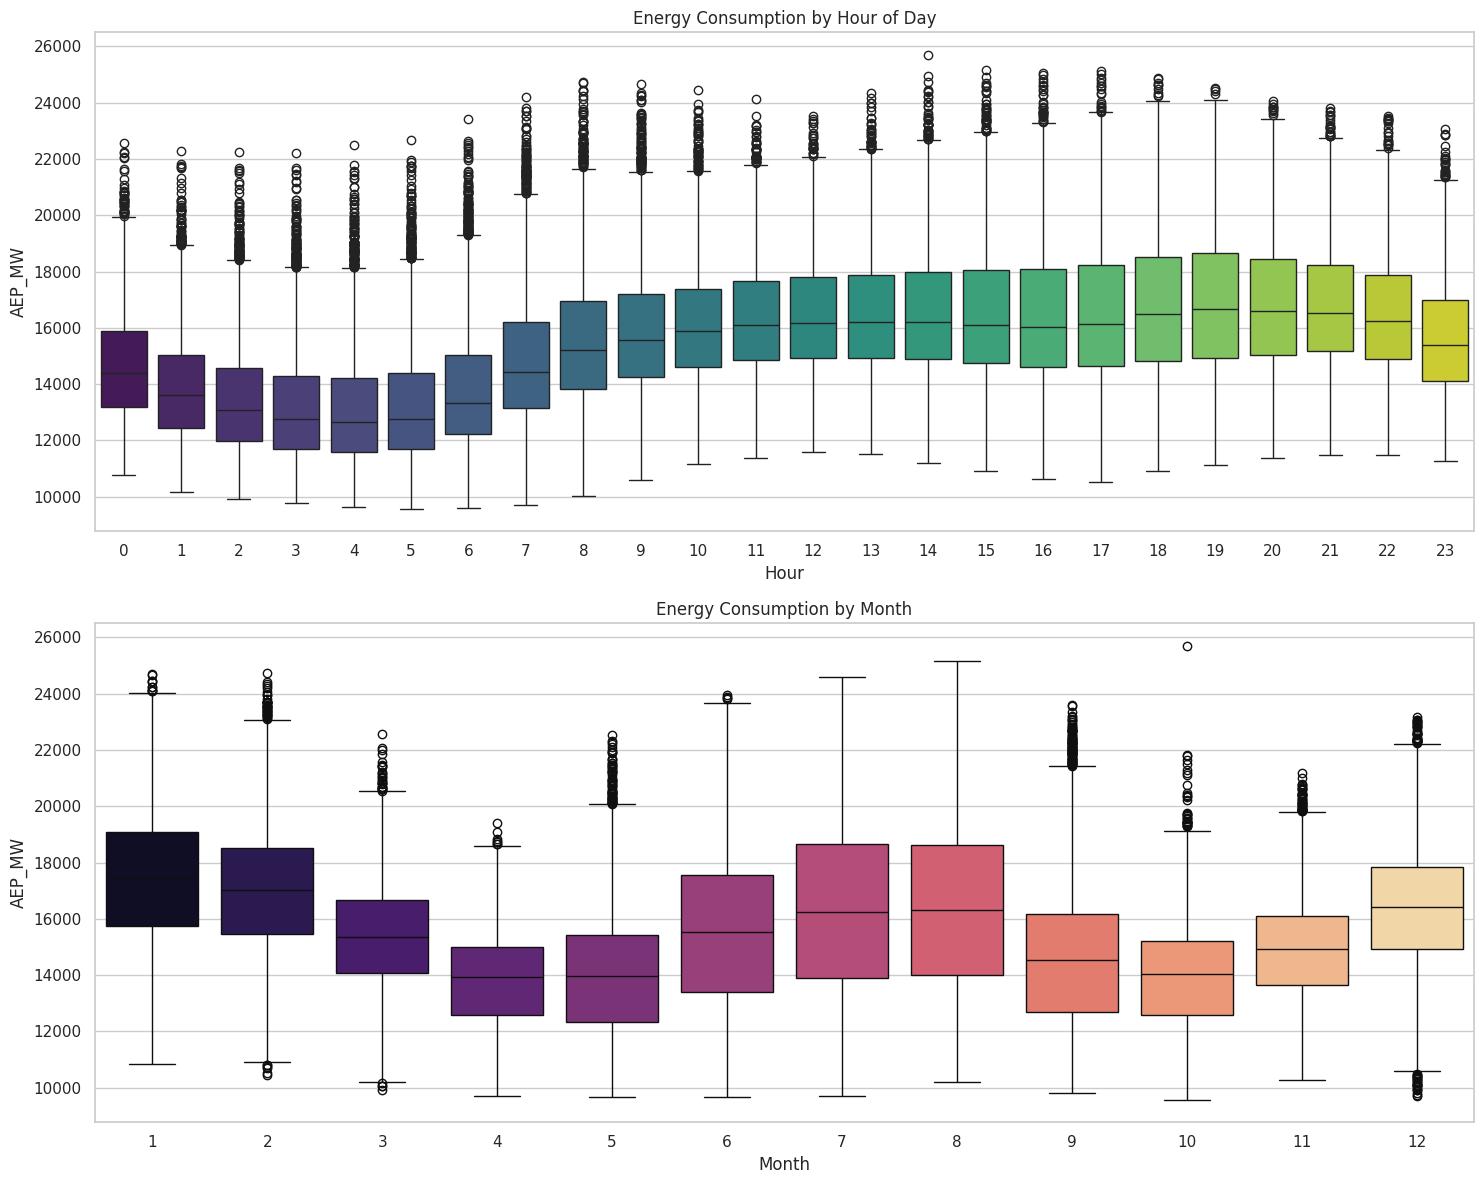

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract time-based features from the index
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

# Set the style for the plots
sns.set_theme(style="whitegrid")

# Create subplots for Hourly and Monthly consumption
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Boxplot for Hourly usage
sns.boxplot(data=df, x='hour', y='AEP_MW', ax=axes[0], palette='viridis')
axes[0].set_title('Energy Consumption by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('AEP_MW')

# Boxplot for Monthly usage
sns.boxplot(data=df, x='month', y='AEP_MW', ax=axes[1], palette='magma')
axes[1].set_title('Energy Consumption by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('AEP_MW')

plt.tight_layout()
plt.show()

In [12]:
df.index

DatetimeIndex(['2004-10-01 01:00:00', '2004-10-01 02:00:00',
               '2004-10-01 03:00:00', '2004-10-01 04:00:00',
               '2004-10-01 05:00:00', '2004-10-01 06:00:00',
               '2004-10-01 07:00:00', '2004-10-01 08:00:00',
               '2004-10-01 09:00:00', '2004-10-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121269, freq=None)

#Train/Split

In [15]:
splitdate = '01-01-2015'
train = df.loc[df.index < splitdate ]
test = df.loc[df.index >= splitdate]

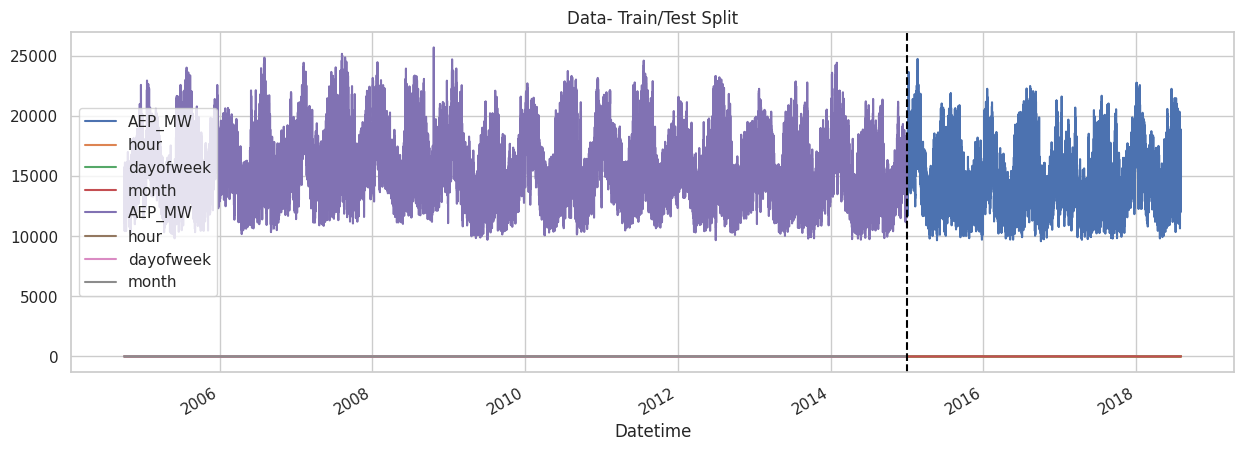

In [21]:
fig , ax = plt.subplots(figsize = (15,5))
test.plot(ax = ax , label = "Test Set", title = "Data- Train/Test Split")
train.plot(ax = ax , label = "Train Set")
ax.axvline(splitdate,color = "black", ls ="--")
ax.legend()

<Axes: xlabel='Datetime'>

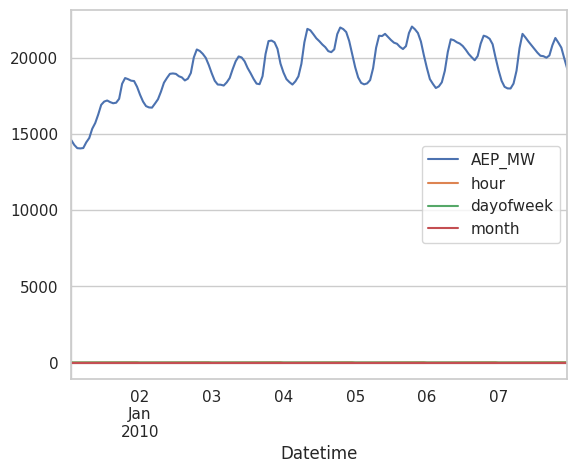

In [26]:
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot()

#feature creation

In [39]:
def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['month'] = df.index.month
  df['quarter'] = df.index.quarter
  df['year'] = df.index.year
  df['dayofyear']= df.index.dayofyear
  return df

In [40]:
df = create_features(df)

## Visulize our data frame

<Axes: xlabel='hour', ylabel='AEP_MW'>

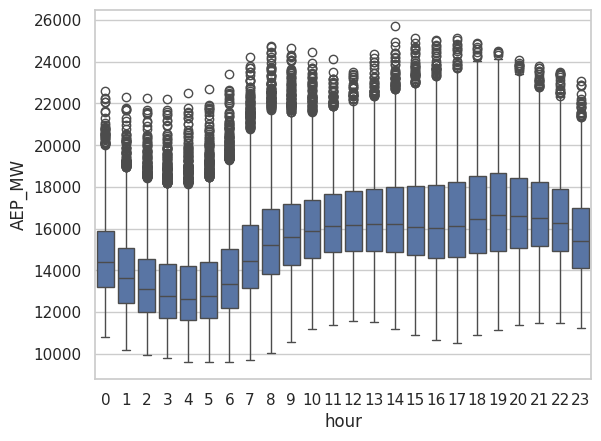

In [50]:
sns.boxplot(data = df, x = 'hour', y = 'AEP_MW')

<Axes: xlabel='month', ylabel='AEP_MW'>

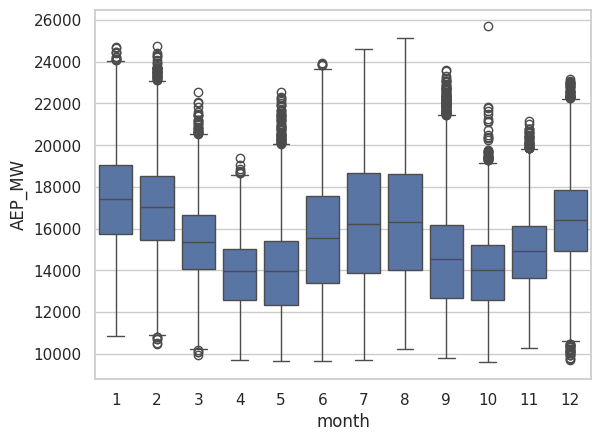

In [51]:
sns.boxplot(data = df, x = 'month', y = 'AEP_MW')

<Axes: xlabel='year', ylabel='AEP_MW'>

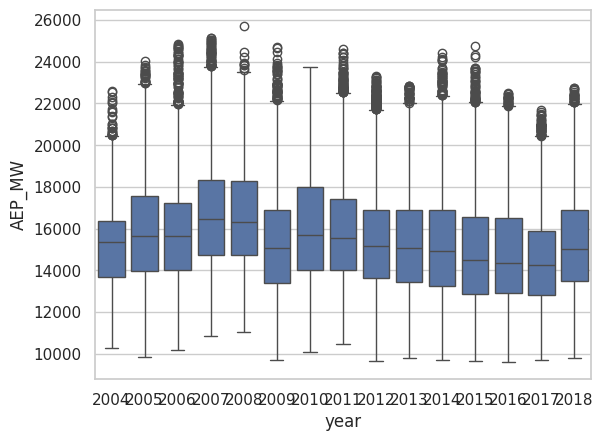

In [55]:
sns.boxplot(data = df, x = 'year', y = 'AEP_MW')

#Create Our Model

In [56]:
train = create_features(train)
test = create_features(test)

/tmp/ipython-input-272484849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/tmp/ipython-input-272484849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
/tmp/ipython-input-272484849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [58]:
df.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'month', 'qurater', 'quarter', 'year',
       'dayofyear'],
      dtype='object')

In [59]:
FEATURES = ['hour', 'dayofweek', 'month', 'quarter', 'year',
       'dayofyear']

In [60]:
TERGET = 'AEP_MW'

In [61]:
X_train = train[FEATURES]
y_train = train[TERGET]
X_test = test[FEATURES]
y_test = test[TERGET]

In [68]:
from re import X
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                       learning_rate = 0.001)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train),(X_test, y_test)],
        verbose= 100)

[0]	validation_0-rmse:2571.77773	validation_1-rmse:2682.80641
[100]	validation_0-rmse:2418.78576	validation_1-rmse:2543.43750
[200]	validation_0-rmse:2285.21817	validation_1-rmse:2423.98310
[300]	validation_0-rmse:2168.46180	validation_1-rmse:2320.61177
[400]	validation_0-rmse:2066.27183	validation_1-rmse:2231.79453
[500]	validation_0-rmse:1977.35501	validation_1-rmse:2156.24245
[600]	validation_0-rmse:1900.68713	validation_1-rmse:2094.93669
[700]	validation_0-rmse:1832.43866	validation_1-rmse:2040.68736
[800]	validation_0-rmse:1772.73840	validation_1-rmse:1993.47912
[900]	validation_0-rmse:1720.57192	validation_1-rmse:1949.32437
[999]	validation_0-rmse:1674.54189	validation_1-rmse:1911.04450


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.001, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

#Feature Importance

In [71]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ['importance'])

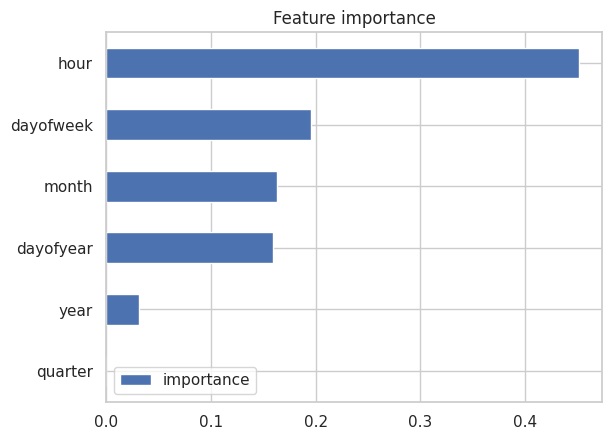

In [74]:
fi.sort_values('importance').plot(kind = 'barh', title = 'Feature importance')
plt.show()

#Forest on test


In [76]:
test['prediction']= reg.predict(X_test)

/tmp/ipython-input-3270105426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']= reg.predict(X_test)


In [80]:
pred = df.merge(test[['prediction']],how = 'left',left_index = True, right_index = True)

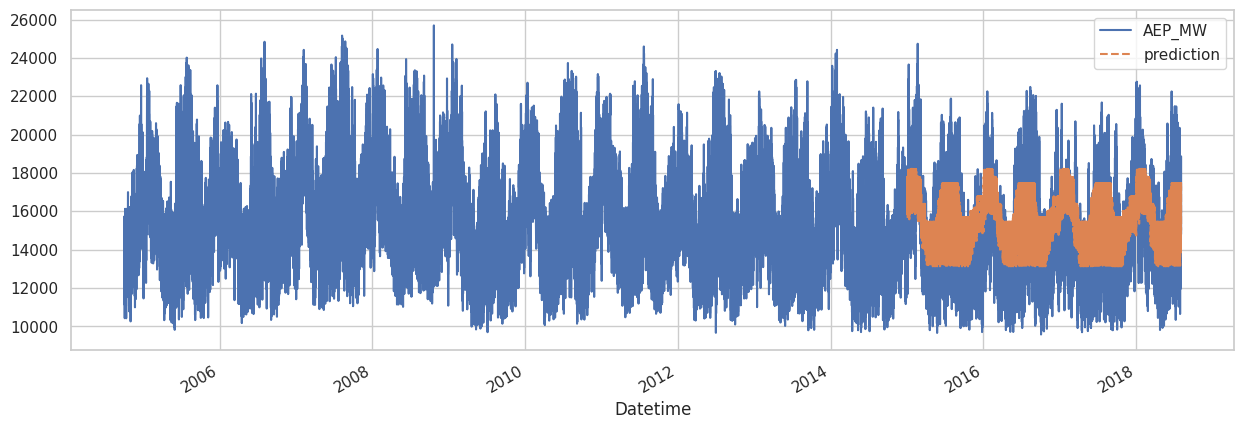

In [86]:
ax = df[['AEP_MW']].plot(figsize = (15,5))
pred['prediction'].plot(ax = ax, style = '--', label = 'prediction')
ax.legend()

In [95]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(score)

1911.044500984849


#Calculate error

In [98]:
test['error'] = np.abs(test[TERGET] - test['prediction'])

/tmp/ipython-input-3909278260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TERGET] - test['prediction'])


In [99]:
test['date'] = test.index.date

/tmp/ipython-input-2096088089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


In [104]:
test.groupby('date')['error'].mean().sort_values(ascending=True).head()

,error
date,
2018-08-03,198.622070
2016-03-04,364.156291
2017-02-03,365.237712
2017-12-17,392.033732
2016-02-26,395.645996
